In [125]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, PunktSentenceTokenizer, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords, state_union
from nltk.wsd import lesk
from nltk.tag import UnigramTagger, BigramTagger, BrillTagger
from nltk.chunk import ne_chunk

In [126]:
matches = pd.read_csv('/home/user/Downloads/IPLChatbot/matches.csv')
deliveries = pd.read_csv('/home/user/Downloads/IPLChatbot/deliveries.csv')

## Runs

In [127]:
##  Runs scored by Batsman B1 in Match X
def runs_batsman_match(batsman_name, match_id):
    x = deliveries.groupby(['match_id', 'batsman'])['batsman_runs'].sum()
    runs = x[match_id][batsman_name]
    return runs 

# Total runs scored by SC Ganguly in match 5?
# SC Ganguly score in match 1?
# how many runs did Ganguly score in match 2?
# Sachin's score in 4th match?
# McCullum scored how much in match 3?
# Dravid's runs in match 2?
# Dravid's score in match 5?

# How much did RCB Score in Match 1?
# RCB Score in match 1?
# RCB runs in match 1
# total score of DDin 3rd match.
# totals runs of Deccan in 8th match
# final score of DD in 3rd match

# maximum score in match 3
# highest score in match 3
# maximum scorer of match 2


# minimum score in match 3
# lowest score in match 3
# minimumscorer of match 2

# who scored the maximum run match 3 by DD
# top scorer for DD in match 3
# top score in DD match 4?
# highest scorer for DD in match 4

# who scored the minimum run match 3 by DD
# least scorer for DD in match 3
# lowest score in DD match 4?
# low scorer for DD in match 4

# total runs scored by sachin?
# aggregate runs by Abhay?
# how many runs has sachin made in ipl1?
# Total runs made by sachin?


# What is the total runs made by RCB?
# what is the runs made by RCB in ipl 9?
# What is the sum total runs made by RCB

# how many fours did Kohli score in match 2?
# 4s hit by Sachin in match 1?
# Fours hit by Abhay in match 5?

# how many sixes did Kohli score in match 2?
# 6s hit by Sachin in match 1?
# Fours hit by Abhay in match 5?
# how many sixes did Kohli hit in match 2?

In [128]:
## Total Runs scored in Match X by team Y
def total_runs_team_match(team, match_id):
    x = deliveries.groupby(['match_id','batting_team'])['total_runs'].sum()
    total_runs_match = x[match_id][team]
    return total_runs_match  

## QUESTIONS
# How much did RCB Score in Match 1?
# RCB Score in match 1?
# RCB runs in match 1
# total score of DDin 3rd match.
# totals runs of Deccan in 8th match
# final score of DD in 3rd match

In [129]:
## Max scorer in match X

def max_score_batsman_match(match_id):
    x = deliveries.groupby(['match_id', 'batsman'])['batsman_runs'].sum()
    name = x[match_id].idxmax()
    runs = x[match_id].max()
    return [name, runs]  

## QUESTIONS
# maximum score in match 3
# highest score in match 3
# maximum scorer of match 2

In [130]:
## Min scorer in match X

def min_score_batsman_match(match_id):
    x = deliveries.groupby(['match_id', 'batsman'])['batsman_runs'].sum()
    name = x[match_id].idxmin()
    runs = x[match_id].min()
    return [name, runs]  

## QUESTIONS
# minimum score in match 3
# lowest score in match 3
# minimumscorer of match 2

In [131]:
## Maxscorer in match X in Team Y
def max_score_batsman_match_inTeam(match_id, team):
    x = deliveries.groupby(['match_id','batting_team', 'batsman'])['batsman_runs'].sum()
    name = x[match_id][team].idxmax()
    runs = x[match_id][team].max()
    return [name, runs]  

## QUESTIONS
# who scored the minimum run match 3 by DD
# least scorer for DD in match 3
# lowest score in DD match 4?
# low scorer for DD in match 4

In [132]:
## Min scorer in match X in Team Y
def min_score_batsman_match_inTeam(match_id, team):
    x = deliveries.groupby(['match_id','batting_team', 'batsman'])['batsman_runs'].sum()
    name = x[match_id][team].idxmin()
    runs = x[match_id][team].min()
    return [name, runs]  

## QUESTIONS
# who scored the minimum run match 3 by DD
# least scorer for DD in match 3
# lowest score in DD match 4?
# low scorer for DD in match 4

In [133]:
## ith highest scorer 
def highest_scorer(i):
    #player_runs = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending =False)
    player_name = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending =False).iloc[i:i+1]
    return  player_name

In [134]:
## batsman total run
def total_runs_batsman_IPL(batsman):
    x = deliveries.groupby(['batsman'])['batsman_runs'].sum()
    runs_batsman = x[batsman]
    return runs_batsman
#total runs scored by sachin?
#aggregate runs by Abhay?
#how many runs has sachin made in ipl1?
#Total runs made by sachin?

In [135]:
#Total runsmade by a team
def total_runs_team_IPL(team):
    x = deliveries.groupby(['batting_team'])['total_runs'].sum()
    total_runs_IPL = x[team]
    return total_runs_IPL

#What is the total runs made by RCB?
#what is the runs made by RCB in ipl 9?
#What is the sum total runs made by RCB


## Boundary

In [136]:
def dot_balls_batsman_match(batsman, match_id):
    x = deliveries[(deliveries['batsman'] == batsman) & (deliveries['match_id'] == match_id) & (deliveries['total_runs'] == 0)]
    dot_balls = x.shape[0]
    return dot_balls

In [137]:
#boundaries hit by a particular batman in particular match
def b_4_batsman_match(batsman, match_id):
    x = deliveries[(deliveries['batsman'] == batsman) & (deliveries['match_id'] == match_id) & (deliveries['total_runs'] == 4)]
    b_4 = x.shape[0]
    return b_4
# how many fours did Kohli score in match 2?
# 4s hit by Sachin in match 1?
# Fours hit by Abhay in match 5?


In [138]:

#Sixes hit by batsman inparticular match
def b_6_batsman_match(batsman, match_id):
    x = deliveries[(deliveries['batsman'] == batsman) & (deliveries['match_id'] == match_id) & (deliveries['total_runs'] == 6)]
    b_6 = x.shape[0]
    return b_6
# how many sixes did Kohli score in match 2?
# 6s hit by Sachin in match 1?
# Fours hit by Abhay in match 5?
#how many sixes did Kohli hit in match 2?

In [139]:
def team_fours(match_id, batting_team):
    team_fours = deliveries[deliveries.batsman_runs == 4]
    team_fours_count = team_fours.groupby(['match_id','batting_team']).count()['inning']
    return team_fours_count[match_id][batting_team]

def team_sixes(match_id, batting_team):
    team_sixes = deliveries[deliveries.batsman_runs == 6]
    team_sixes_count = team_sixes.groupby(['match_id','batting_team']).count()['inning']
    return team_sixes_count[match_id][batting_team]


def overall_fours_count(batsman):
    fours = deliveries[deliveries.batsman_runs == 4]
    fours_count = fours.groupby('batsman').count()['inning']
    return fours_count[batsman]


def overall_sixes_count(batsman):
    sixes = deliveries[deliveries.batsman_runs == 6]
    sixes_count = sixes.groupby('batsman').count()['inning']
    return sixes_count[batsman]


def most_fours_count(i):
    fours = deliveries[deliveries.batsman_runs == 4]
    fours_count = fours.groupby('batsman').count()['inning']
    return fours_count.sort_values(ascending = False).iloc[i:i+1]


def most_sixes_count():
    sixes = deliveries[deliveries.batsman_runs == 6]
    sixes_count = sixes.groupby('batsman').count()['inning'].sort_values(ascending = False).iloc[0:1]
    return sixes_count


## Strike Rate

In [140]:
def balls_faced_batsman_match(batsman, match_id):
    x = deliveries[(deliveries['batsman'] == batsman) & (deliveries['match_id'] == match_id) & (deliveries['wide_runs'] == 0)]
    return x.shape[0]
def strikeRate_batsman_match(batsman, match_id):
    runs = runs_batsman_match(batsman, match_id)
    balls = balls_faced_batsman_match(batsman, match_id)
    
    strike_rate = runs/balls * 100
    return strike_rate

def total_runs_scored_IPL():
    runs_count = deliveries.groupby('batsman')['batsman_runs'].sum()
    return runs_count

def total_ball_faced_IPL():
    balls = deliveries[(deliveries.wide_runs == 0)].groupby('batsman')['inning']
    balls_count = balls.count()
    return balls_count

def total_strike_rate_IPL(i):
    strike_rate = (total_runs_scored_IPL()/total_ball_faced_IPL())*100
    return strike_rate.sort_values(ascending = False).iloc[i:i+1]


In [141]:
corrected_train = """Total/JJ runs/NNS scored/VBN by/IN sc/NNp ganguly/NNP in/IN match/NN 5/CD ?/.
sc/NNP ganguly/NNP 's/POS score/NN in/IN match/NN 1/CD ?/.
how/WRB many/JJ runs/NNS did/VBD ganguly/NNP score/NN in/IN match/NN 2/CD ?/.
sachin/NNp 's/POS score/NN in/IN 4th/CD match/NN ?/.
McCullum/NNP scored/VBD how/WRB much/JJ in/IN match/NN 3/CD ?/.
Dravid/NNP 's/POS runs/NNS in/IN match/NN 2/CD ?/.
Dravid/NNP 's/POS score/NN in/IN match/NN 5/CD ?/.
How/WRB much/JJ did/VBD Royal/NNP Challenger/NNP Bangalore/NNP score/NN in/IN match/NN 1/CD ?/.
RCB/NNP score/NN in/IN match/NN 1/CD ?/.
RCB/NNP runs/VBZ in/IN match/NN 1/CD
total/JJ score/NN of/IN DDin/NNP 3rd/CD match/NN
totals/NNS runs/NNS of/IN Deccan/NNP in/IN 8th/CD match/NN
final/JJ score/NN of/IN DD/NNP in/IN 3rd/CD match/NN
Rahul/NNP maximum/JJ score/NN in/IN match/NN 3/CD
who/WP was/VBD the/DT leading/VBG run/NN scorer/NN in/IN match/NN 9/CD
highest/JJS score/NN in/IN match/NN 3/CD
maximum/JJ scorer/NN of/IN match/NN 2/CD
minimum/JJ score/NN in/IN match/NN 3/CD
lowest/JJS score/NN in/IN match/NN 3/CD
minimumscorer/NN of/IN match/NN 2/CD
who/WP scored/VBD the/DT maximum/JJ run/NN match/NN 3/CD by/IN DD/NNP
top/JJ scorer/NN for/IN DD/NNP in/IN match/NN 3/CD
top/JJ score/NN in/IN DD/NNP match/NN 4/CD ?/.
highest/JJS scorer/NN for/IN DD/NNP in/IN match/NN 4/CD
who/WP scored/VBD the/DT minimum/JJ run/NN match/NN 3/CD by/IN dd/NN
least/JJS scorer/NN for/IN DD/NNP in/IN match/NN 3/CD
lowest/JJS score/NN in/IN DD/NNP match/NN 4/CD ?/.
low/JJ scorer/NN for/IN DD/NNP in/IN match/NN 4/CD
total/JJ runs/NNS scored/VBN by/IN sachin/NN ?/.
aggregate/NN runs/NNS by/IN Abhay/NNP ?/.
how/WRB many/JJ runs/NNS has/VBZ sachin/VBN made/VBN in/IN ipl1/NN ?/.
Total/JJ runs/NNS made/VBN by/IN sachin/NN ?/.
What/WP is/VBZ the/DT total/JJ runs/NNS made/VBN by/IN RCB/NNP ?/.
what/WP is/VBZ the/DT runs/NNS made/VBN by/IN RCB/NNP in/IN ipl/NN 9/CD ?/.
What/WP is/VBZ the/DT sum/JJ total/NN runs/NNS made/VBN by/IN RCB/NNP
how/WRB many/JJ fours/NNS did/VBD Kohli/NNP score/NN in/IN match/NN 2/CD ?/.
4s/CD hit/VBN by/IN Sachin/NNP in/IN match/NN 1/CD ?/.
Fours/NNS hit/VBN by/IN Abhay/NNP in/IN match/NN 5/CD ?/.
how/WRB many/JJ sixes/NNS did/VBD Kohli/NNP score/NN in/IN match/NN 2/CD ?/.
6s/CD hit/VBN by/IN Sachin/NNP in/IN match/NN 1/CD ?/.
Sixes/NNS hit/VBN by/IN Abhay/NNP in/IN match/NN 5/CD ?/.
how/WRB many/JJ sixes/NNS did/VBD Kohli/NNP hit/VB in/IN match/NN 2/CD ?/.
who/WP scored/VBD maximum/JJ runs/NNS in/IN match/NN 6/CD
who/WP was/VBD the/DT top/JJ scorer/NN in/IN match/NN 6/CD"""

In [142]:
tagged_question = []
for word in word_tokenize(corrected_train):
    tagged_question.append(nltk.str2tuple(word))
print(tagged_question)
train_data = []
train_data.append(tagged_question)

[('Total', 'JJ'), ('runs', 'NNS'), ('scored', 'VBN'), ('by', 'IN'), ('sc', 'NNP'), ('ganguly', 'NNP'), ('in', 'IN'), ('match', 'NN'), ('5', 'CD'), ('?', None), ('', ''), ('.', None), ('sc', 'NNP'), ('ganguly', 'NNP'), ("'s", 'POS'), ('score', 'NN'), ('in', 'IN'), ('match', 'NN'), ('1', 'CD'), ('?', None), ('', ''), ('.', None), ('how', 'WRB'), ('many', 'JJ'), ('runs', 'NNS'), ('did', 'VBD'), ('ganguly', 'NNP'), ('score', 'NN'), ('in', 'IN'), ('match', 'NN'), ('2', 'CD'), ('?', None), ('', ''), ('.', None), ('sachin', 'NNP'), ("'s", 'POS'), ('score', 'NN'), ('in', 'IN'), ('4th', 'CD'), ('match', 'NN'), ('?', None), ('', ''), ('.', None), ('McCullum', 'NNP'), ('scored', 'VBD'), ('how', 'WRB'), ('much', 'JJ'), ('in', 'IN'), ('match', 'NN'), ('3', 'CD'), ('?', None), ('', ''), ('.', None), ('Dravid', 'NNP'), ("'s", 'POS'), ('runs', 'NNS'), ('in', 'IN'), ('match', 'NN'), ('2', 'CD'), ('?', None), ('', ''), ('.', None), ('Dravid', 'NNP'), ("'s", 'POS'), ('score', 'NN'), ('in', 'IN'), ('match

In [143]:
from nltk.data import load
pos_tag = load('taggers/maxent_treebank_pos_tagger/english.pickle')

In [144]:
from nltk.tag import SequentialBackoffTagger
class POSTagger(SequentialBackoffTagger):
    def __init__(self, *args, **kwargs):
        SequentialBackoffTagger.__init__(self, *args, **kwargs)
    
    def choose_tag(self, tokens, index, history):
        word = tokens[index]
        return nltk.pos_tag([word])[0][1] if word != "" else None
custom_pos_tagger = POSTagger()

In [145]:
import nltk
import nltk.tag
from nltk.tag import brill
from nltk.tag import UnigramTagger
#from nltk.tag.brill import SymmetricProximateTokensTemplate, ProximateTokensTemplate
#from nltk.tag.brill import ProximateTagsRule, ProximateWordsRule
# The brill tagger module in NLTK.
from nltk.tag import BrillTaggerTrainer
    
templates = [brill.Template(brill.Pos([1,1])),
    brill.Template(brill.Pos([2,2])),
    brill.Template(brill.Pos([1,2])),
    brill.Template(brill.Pos([1,3])),
    brill.Template(brill.Pos([1,1])),
    brill.Template(brill.Pos([2,2])),
    brill.Template(brill.Pos([1,2])),
    brill.Template(brill.Pos([1,3])),
    brill.Template(brill.Word([-1, -1])),
    brill.Template(brill.Word([-1, -1]))]

trainer_initial_pos = BrillTaggerTrainer(initial_tagger= custom_pos_tagger, templates=templates, trace=3, deterministic=True)
brill_tagger = trainer_initial_pos.train(train_data, max_rules=10)

TBL train (fast) (seqs: 1; tokens: 378; tpls: 10; min score: 2; min acc: None)
Finding initial useful rules...
    Found 444 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  24  24   0   0  | .->None if Pos:None@[1]
  24  24   0   0  | None-> if Pos:.@[1]
  24  24   0   0  | .->None if Word:@[-1]
   8   9   1   6  | NN->NNP if Pos:NN@[1]
   5   8   3   0  | NN->NNP if Word:by@[-1]
   4   4   0   0  | NN->NNP if Pos:POS@[1]
   4   4   0   0  | NN->NNP if Word:for@[-1]
   3   3   0   0  | VB->NN if Pos:NN@[1]
   3   3   0   0  | NN->JJ if Word:the@[-1]
   3   3   0   0  | VBN->VBD if Pos:JJ@[2]


In [391]:
train_sentences = [ ('Total runs scored by SC Ganguly in match 5?' ,'runs'),
                    ('SC Ganguly score in match 1?','runs'),
                    ('how many runs did Ganguly score in match 2?','runs'),
                    ("Sachin's score in 4th match?", 'runs'),
                    ('how much did McCullum scored in match 3?','runs'),
                    ('how much did McCullum scored in match 4?','runs'),
                    ('McCullum runs in match 3?','runs'),
                    ("Dravid's runs in match 2?",'runs'),
                    ("Dravid's score in match 5?",'runs'),
                    ('How much did RCB Score in Match 1?','runs'),
                    ('RCB Score in match 1?','runs'),
                    ('RCB runs in match 1','runs'),
                    ('total score of DD in 3rd match','runs'),
                    ('totals runs of Deccan in 8th match','runs'),
                    ('final score of DD in 3rd match','runs'),
                   
                    ('Rahul maximum score in match 3','max_runs'),
                    ("who was the leading run scorer in match 9", 'max_runs'),
                    ('highest score in match 3','max_runs'),
                    ('maximum scorer of match 2','max_runs'),
                    ("who scored the maximum run in match 3 from DD",'max_runs'),
                    ("top scorer for DD in match 3",'max_runs'),
                    ("top score in DD match 4?",'max_runs'),
                    ("highest scorer for DD in match 4",'max_runs'),
                    ("who scored maximum runs in match 6", 'max_runs'),
                    ("who was the top scorer in match 6", 'max_runs'),
                    ("who was the leading run scorer in match 9", 'max_runs'),
                    ("who scored maximum runs in match 6", 'max_runs'),
                    ("who was the top scorer in match 6", 'max_runs'), 
                    ("who scored the maximum run match 3 by DD",'max_runs'),
                   
                    ('minimum score in match 3', 'min_runs'),
                    ('lowest score in match 3','min_runs'),
                    ('minimum scorer of match 2','min_runs'),
                    ("who scored the minimum run match 3 by DD",'min_runs'),
                    ("least scorer for DD in match 3",'min_runs'),
                    ("lowest score in DD match 4?",'min_runs'),
                    ("low scorer for DD in match 4",'min_runs'),
                    
                   
                    ("total runs scored by sachin?",'total_runs'),
                    ("aggregate runs by Abhay?",'total_runs'),
                    ("how many runs has sachin made in ipl 1?",'total_runs'),
                    ("Total runs made by sachin?",'total_runs'),
                    ("What is the total runs made by RCB?",'total_runs'),
                    ("what is the runs made by RCB in ipl 9?",'total_runs'),
                    ("What is the sum total runs made by RCB",'total_runs'),
                   
                    ("who was 3rd highest scorer in match 3?",'ith_highest_scorer'),
                    ("who was 3rd top scorer in match 4?",'ith_highest_scorer'),
                    ("who was 2nd maximum run scorer in match 6?",'ith_highest_scorer'), 
                   
                    ("rahul faced how many dot balls in match 1",'dot_balls'),
                    ("rahul faced how many dots in match 1",'dot_balls'),
                   
                    ("how many fours did Kohli score in match 2?",'fours'),
                    ("4s hit by Sachin in match 1?",'fours'),
                    ("Fours hit by Abhay in match 5?",'fours'),
                    ("how many boundaries are scored by rcb in match 6",'fours'),
                    ("how many 4s are scored by rcb in match 3",'fours'),
                    ("how many fours are scored by rcb in match 6",'fours'),
                    ("how many boundaries are hit by rcb in match 6",'fours'),
                    ("how many 4s are hit by rcb in match 6",'fours'),
                    ("how many fours are hit by rcb in match 6",'fours'),
                    ("what are total boundaries of rcb in match 6",'fours'),
                    ("what are total fours of rcb in match 6",'fours'),
                    ("what are total 4s of rcb in match 5",'fours'),
                    
                    ("how many fours are hit by kohli in this season?",'fours'),
                    ("how many 4s are hit by kohli in this season?",'fours'),
                    ("how many boundaries are hit by kohli in this season?",'fours'),
                    ("how many fours are scored by kohli in this season?",'fours'),
                    ("how many 4s are scored by kohli in this season?",'fours'),
                    ("how many boundaries are hit by kohli in this season?",'fours'),
                    ("how many boundaries are hit by kohli in this entire ipl?",'fours'),
                    ("how many 4s are hit by kohli in this entire ipl?",'fours'),
                    ("how many fours are hit by kohli in this entire ipl?",'fours'),
                    ("how many boundaries are hit by kohli in this whole ipl?",'fours'),
                    ("how many 4s are hit by kohli in this whole ipl?",'fours'),
                    ("how many fours are hit by kohli in this whole ipl?",'fours'),
                    ("who scored most fours in entire ipl?",'fours'),
                    ("who hit most fours in entire ipl?",'fours'),
                    ("who scored most 4s in entire ipl?",'fours'),
                    ("who hit most 4s in entire ipl?",'fours'), 
                    ("who scored most boundaries in entire ipl?",'fours'),
                    ("who hit most boundaries in entire ipl?",'fours'), 
                    ("who scored most fours in whole ipl?",'fours'),
                    ("who hit most fours in whole ipl?",'fours'),
                    ("who scored most 4s in whole ipl?",'fours'),
                    ("who hit most 4s in whole ipl?",'fours'), 
                    ("who scored most boundaries in whole ipl?",'fours'),
                    ("who hit most boundaries in whole ipl?",'fours'), 
                    ("who scored most fours in this season?",'fours'),
                    ("who hit most fours in this season?",'fours'),
                    ("who scored most 4s in this season?",'fours'),
                    ("who hit most 4s in this season?",'fours'), 
                    ("who scored most boundaries in this season?",'fours'),
                    ("who hit most boundaries in this season?",'fours'),
                   
                    ("how many 6s are scored by rcb in match 6",'sixes'),
                    ("how many sixes are scored by rcb in match 6",'sixes'),
                    ("how many 6s are hit by rcb in match 6",'sixes'),
                    ("how many sixes are hit by rcb in match 6",'sixes'),
                    ("what are total sixes of rcb in match 6",'sixes'),
                    ("what are total 6s of rcb in match 5",'sixes'), 
                    ("how many sixes are hit by kohli in this season?",'sixes'),
                    ("how many 6s are hit by kohli in this season?",'sixes'),
                    ("how many sixes are scored by kohli in this season?",'sixes'),
                    ("how many 6s are scored by kohli in this season?",'sixes'),
                    ("how many 6s are hit by kohli in this entire ipl?",'sixes'),
                    ("how many sixes are hit by kohli in this entire ipl?",'sixes'),
                    ("how many 6s are hit by kohli in this whole ipl?",'sixes'),
                    ("how many sixes are hit by kohli in this whole ipl?",'sixes'),  
                    ("who scored most sixes in entire ipl?",'sixes'),
                    ("who hit most sixes in entire ipl?",'sixes'),
                    ("who scored most 6s in entire ipl?",'sixes'),
                    ("who hit most 6s in entire ipl?",'sixes'), 
                    ("who scored most sixes in whole ipl?",'sixes'),
                    ("who hit most sixes in whole ipl?",'sixes'),
                    ("who scored most 6s in whole ipl?",'sixes'),
                    ("who hit most 6s in whole ipl?",'sixes'), 
                    ("who scored most sixes in this season?",'sixes'),
                    ("who hit most sixes in this season?",'sixes'),
                    ("who scored most 6s in this season?",'sixes'),
                    ("who hit most 6s in this season?",'sixes'),
                    ("how many sixes did Kohli score in match 2?",'sixes'),
                    ("6s hit by Sachin in match 1?",'sixes'),
                    ("Sixes hit by Abhay in match 5?",'sixes'),
                    ("how many sixes did Kohli hit in match 2?",'sixes'),
                    ("How much did McCullum six hit in match 1",'sixes'),
                    ("How much did McCullum six hit in match 1",'sixes'),
                    ("How much did McCullum six hit in match 1",'sixes'),
                    ("How much did McCullum 6 hit in match 1",'sixes'),
                    ("How much did McCullum 6 hit in match 1",'sixes'),
                    ("How much did McCullum 6 hit in match 1",'sixes')
                  ]

In [392]:
def feature_extractor(words):
    features = {'highest': 0
                ,'scored': 0
                ,'runs': 0
                ,'scorer': 0
                ,'score':0
                ,'scored':0
                ,'match':0
                ,'wickets': 0
                ,'boundary': 0
                ,'fours':0
                ,'4s':0
                ,'six':0
                ,'sixes':0
                ,'6s':0
                ,'6':0
                ,'hit':0
                ,'four':0
                ,'aggregate':0
                ,'total':0
                ,'team':0
                ,'lead':0
                ,'leading':0
                ,'maximum':0
                ,'max':0
                ,'minimum':0
                ,'min':0
                ,'least':0
                ,'less':0
                ,'1st':0,'2nd':0,'3rd':0,'4th':0,'5th':0,'6th':0,'7th':0,'8th':0,'9th':0,'10th':0    
                ,'dot':0
                ,'dots':0
                ,'faced':0 
                ,'entire':0
                ,'whole':0
                ,'season':0
               }
    #tokenized_sentence = nltk.word_tokenize(sentence)
    word_counts = nltk.Counter(words)
    for word in word_counts:
        if word in features:
            features[word] = word_counts[word]
    return features

In [393]:
naive_bayes_classifier = nltk.NaiveBayesClassifier.train([(feature_extractor(nltk.word_tokenize(sentence)), label) for sentence, label in train_sentences])

In [394]:
a = []
boundary_list =['4s','6s','sixes','fours']
query = "How much did BB McCullum 6 hit in match 1?"
words = nltk.word_tokenize(query)
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
for word in words:
     if word.lower() not in stop_words:
            if word in boundary_list:
                a.append(word)
            else:
                a.append(lemmatizer.lemmatize(word))
#brill_tagger.tag(a)

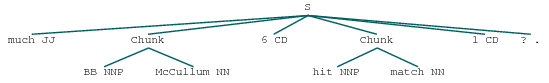

In [395]:
classifier = naive_bayes_classifier.classify(feature_extractor(a))

tagged = brill_tagger.tag(a)
chunkGram = r"""Chunk:{<NN.?>*<NN.?>*}"""
chunkParser = nltk.RegexpParser(chunkGram)
chunked = chunkParser.parse(tagged)
chunked

In [396]:
team_list = matches.team1.unique()
classifier

'sixes'

In [397]:
chunked_words = []
for node in chunked:
    if hasattr(node, "label"):
        words = [word for word, tag in node.leaves()]
        chunked_words += words
        
chunked_words

['BB', 'McCullum', 'hit', 'match']

In [398]:
#Returns full Player name -

def function_return_fullName(chunked_words):
    batsman_list = list(deliveries.batsman.unique())
    bowler_list = list(deliveries.bowler.unique())
    fielder_list = list(deliveries.fielder.unique())
    temp = {'player':[],'team':[]}
    teams_abbr = [ ('Kolkata Knight Riders', 'kolkata knight riders', 'kolkata', 'kolkata riders', 'kolkata rider', 'kolkata knights', 'kolkata knight', 'knight riders', 'knight rider', 'riders', 'k k riders', 'k knight riders', 'kkr'), 
               ('Chennai Super Kings', 'chennai super kings', 'chennai', 'chennai kings', 'chennai super', 'super kings', 'chennai kings', 'csk'),  
               ('Rajasthan Royals', 'rajasthan royals', 'rajasthan', 'rajasthan royal', 'rr'),
               ('Mumbai Indians', 'mumbai indians', 'mumbai', 'mumbai indian', 'indians', 'indian', 'mi'), 
               ('Deccan Chargers', 'deccan chargers', 'deccan', 'deccan charger', 'chargers', 'charger', 'dc'), 
               ('Kings XI Punjab', 'kings xi punjab', 'kings', 'punjab', 'kings XI', 'kings punjab',  'kxip','kp', 'kxp'), 
               ('Royal Challengers Bangalore', 'royal challengers bangalore', 'bangalore', 'royal challengers', 'royal challenger', 'royal bangalore', 'challengers bangalore', 'challenger bangalore', 'rcb', 'rb'),
               ('Delhi Daredevils', 'delhi daredevils', 'delhi', 'daredevils', 'delhi daredevil', 'dd') ]
               
    for data in chunked_words:
        for w in (batsman_list or bowler_list or fielder_list):
            if w.lower() == data.lower():
                temp['player'].append(w)
            elif str(w.split()[len(w.split())-1]).lower() == data.lower():
                temp['player'].append(w)
        for w in teams_abbr:
            if data.lower() in w:
                temp['team'].append(w[0])         

    return temp

In [399]:
chunked_dict = function_return_fullName(chunked_words)
chunked_dict

{'player': ['BB McCullum'], 'team': []}

In [402]:
if classifier == 'sixes':
    try:
        if chunked_dict['team'] != []:
            team_name = chunked_dict['team'][0]
            for i in range(len(chunked)): 
                if chunked[i][1] == 'CD':
                    flag = 0
                    for p in boundary_list:
                        if chunked[i][1] == p:
                            flag = 1
                    if flag == 0:
                        match_id = chunked[i][0]
            print(team_sixes(int(match_id), team_name))
        else:
            for i in range(len(chunked)): 
                if chunked[i][1] == 'CD':
                    flag = 0
                    for p in boundary_list:
                        if chunked[i][1] == p:
                            flag = 1
                    if flag == 0:
                        match_id = chunked[i][0]
                        print(match_id)
            print(b_6_batsman_match(person_name ,int(match_id)))
    except:
        print("SIXES")


6
1
0


In [400]:
if classifier == 'runs':
    try:
        if chunked_dict['team'] != []:
            team_name = chunked_dict['team'][0]
            for i in range(len(chunked)): 
                if chunked[i][1] == 'CD':
                    match_id = chunked[i][0]
            print(total_runs_team_match(team_name,int(match_id)))
        else :
            for i in range(len(chunked)): 
                person_name = chunked_dict['player'][0]
                if chunked[i][1] == 'CD':
                    match_id = chunked[i][0]
            print(runs_batsman_match(person_name,int(match_id)))
    except:
        print("I am a chatbot not your servant. Go and find yourself :D")
        
elif classifier =='max_runs':
    try:
        if chunked_dict['team'] != []:
            team_name = chunked_dict['team'][0]
            for i in range(len(chunked)): 
                if chunked[i][1] == 'CD':
                    match_id = chunked[i][0]
            print(max_score_batsman_match_inTeam(int(match_id), team_name))
        else:
            for i in range(len(chunked)): 
                if chunked[i][1] == 'CD':
                    match_id = chunked[i][0]
            print(max_score_batsman_match(int(match_id)))
    except:
        print("Write something I don't want to be alone")
        
elif classifier =='min_runs':
    try:
        if chunked_dict['team'] != []:
            team_name = chunked_dict['team'][0]
            for i in range(len(chunked)): 
                if chunked[i][1] == 'CD':
                    match_id = chunked[i][0]
            print(min_score_batsman_match_inTeam(int(match_id), team_name))
        else:
            for i in range(len(chunked)): 
                if chunked[i][1] == 'CD':
                    match_id = chunked[i][0]
            print(min_score_batsman_match(int(match_id)))
    except:
        print("min_runs")
        
elif classifier == 'total_runs':
    try:
        if chunked_dict['team'] != []:
            team_name = chunked_dict['team'][0]
            print(total_runs_team_IPL(team_name))
        else :
            for i in range(len(chunked)): 
                person_name = chunked_dict['player'][0]
            print(total_runs_batsman_IPL(person_name))
    except:
        print("total_runs")
        
elif classifier == 'fours':
    try:
        if chunked_dict['team'] != []:
            team_name = chunked_dict['team'][0]
            for i in range(len(chunked)): 
                if chunked[i][1] == 'CD':
                    flag = 0
                    for p in boundary_list:
                        if chunked[i][1] == p:
                            flag = 1
                    if flag == 0:
                        match_id = chunked[i][0]
            print(team_fours(int(match_id), team_name))
        else:
            for i in range(len(chunked)): 
                if chunked[i][1] == 'CD':
                    flag = 0
                    for p in boundary_list:
                        if chunked[i][1] == p:
                            flag = 1
                    if flag == 0:
                        match_id = chunked[i][0]
            print(b_4_batsman_match(person_name ,int(match_id)))
    except:
        print("fours")

elif classifier == 'sixes':
    try:
        if chunked_dict['team'] != []:
            team_name = chunked_dict['team'][0]
            for i in range(len(chunked)): 
                if chunked[i][1] == 'CD':
                    flag = 0
                    for p in boundary_list:
                        if chunked[i][1] == p:
                            flag = 1
                    if flag == 0:
                        match_id = chunked[i][0]
            print(team_sixes(int(match_id), team_name))
        else:
            for i in range(len(chunked)): 
                if chunked[i][1] == 'CD':
                    flag = 0
                    for p in boundary_list:
                        if chunked[i][1] == p:
                            flag = 1
                    if flag == 0:
                        match_id = chunked[i][0]    
            print(b_6_batsman_match(person_name ,int(match_id)))
    except:
        print("SIXES")


0
